## Collecting the data from the web

In [ ]:
from crawler import scrape_market_insider

scrape_market_insider("data")

Level 60:root:Scraping shortterm
Level 60:root:Into page 1


## Collating the data into one data file

In [2]:
from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Finished processing


In [3]:
import pandas as pd

data = pd.read_csv('data/data.csv')

In [4]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Days,Bond Months,Bond Years
0,CA135087B451,CAD,NaN,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,3987,132.900000,11.075000
1,CA135087D507,CAD,NaN,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,3989,132.966667,11.080556
2,CA135087E679,CAD,NaN,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,3968,132.266667,11.022222
3,CA135087F825,CAD,NaN,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,3954,131.800000,10.983333
4,CA135087H235,CAD,NaN,3.33%,Aaa,2028-06-01,94.91,95.03,2017-08-01,3957,131.900000,10.991667
...,...,...,...,...,...,...,...,...,...,...,...,...
296,CA135087Q319,CAD,3.7500%,4.36%,Aaa,2025-05-01,99.26,99.38,2023-02-10,811,27.033333,2.252778
297,CA135087P402,CAD,3.0000%,4.75%,Aaa,2024-11-01,98.70,98.71,2022-08-15,809,26.966667,2.247222
298,CA135087P816,CAD,3.0000%,3.79%,Aaa,2026-04-01,98.42,98.54,2023-01-20,1167,38.900000,3.241667
299,CA135087Q806,CAD,4.5000%,4.04%,Aaa,2025-11-01,100.93,100.94,2023-08-04,820,27.333333,2.277778


In [22]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [23]:
data.reset_index(inplace=True)

In [24]:
data.drop('index', axis=1, inplace=True)

In [25]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Days,Bond Months,Bond Years
0,CA135087B451,CAD,NaN,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,3987,132.900000,11.075000
1,CA135087D507,CAD,NaN,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,3989,132.966667,11.080556
2,CA135087E679,CAD,NaN,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,3968,132.266667,11.022222
3,CA135087F825,CAD,NaN,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,3954,131.800000,10.983333
4,CA135087H235,CAD,NaN,3.33%,Aaa,2028-06-01,94.91,95.03,2017-08-01,3957,131.900000,10.991667


In [26]:
data.to_csv('data/cleaned_data.csv', index=False)

In [27]:
data['Maturity Year'] = pd.to_datetime(data['Maturity Date']).dt.year
data['Issue Year'] = pd.to_datetime(data['Issue Date']).dt.year

In [28]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Days,Bond Months,Bond Years,Maturity Year,Issue Year
0,CA135087B451,CAD,NaN,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,3987,132.900000,11.075000,2024,2013
1,CA135087D507,CAD,NaN,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,3989,132.966667,11.080556,2025,2014
2,CA135087E679,CAD,NaN,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,3968,132.266667,11.022222,2026,2015
3,CA135087F825,CAD,NaN,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,3954,131.800000,10.983333,2027,2016
4,CA135087H235,CAD,NaN,3.33%,Aaa,2028-06-01,94.91,95.03,2017-08-01,3957,131.900000,10.991667,2028,2017


In [29]:
import matplotlib.pyplot as plt

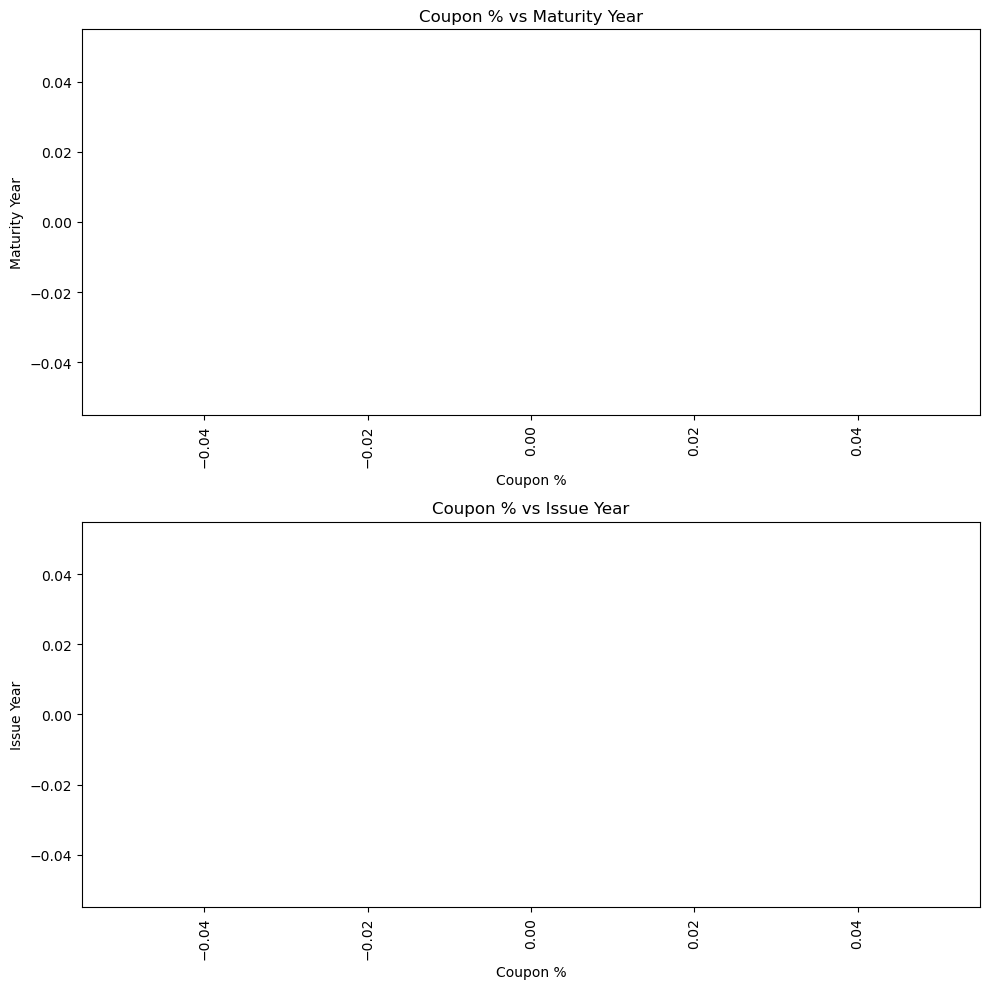

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(data['Coupon'], data['Maturity Year'], marker='o', linestyle='', color='b')
axs[0].set_title('Coupon % vs Maturity Year')
axs[0].set_ylabel('Maturity Year')
axs[0].set_xlabel('Coupon %')

axs[1].plot(data['Coupon'], data['Issue Year'], marker='o', linestyle='', color='r')
axs[1].set_title('Coupon % vs Issue Year')
axs[1].set_ylabel('Issue Year')
axs[1].set_xlabel('Coupon %')

for ax in axs:
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

plt.show()

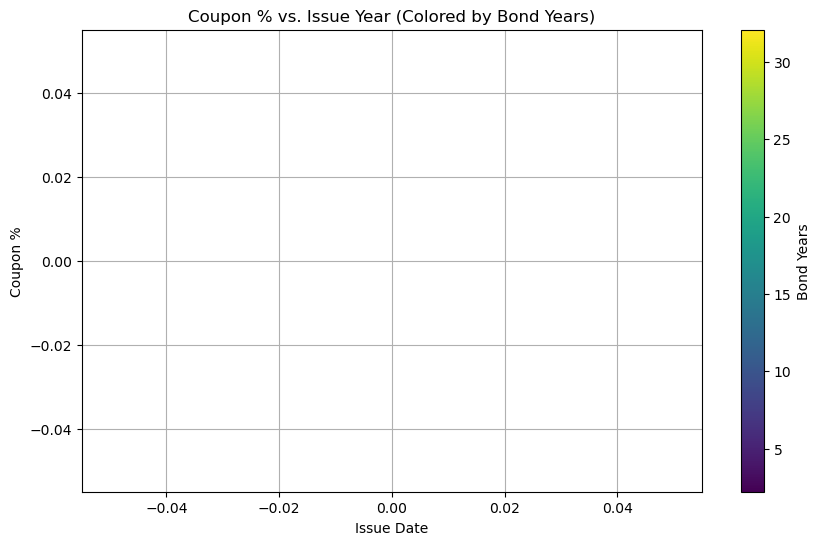

In [13]:
from utils import plot_coupon_issue

plot_coupon_issue(data)

In [14]:
area_one = data['Issue Year']>=2020
area_two = data['Maturity Year']>=2025
area_three = data['Coupon']>=3

In [15]:
filtered_data = data[area_one & area_two & area_three]

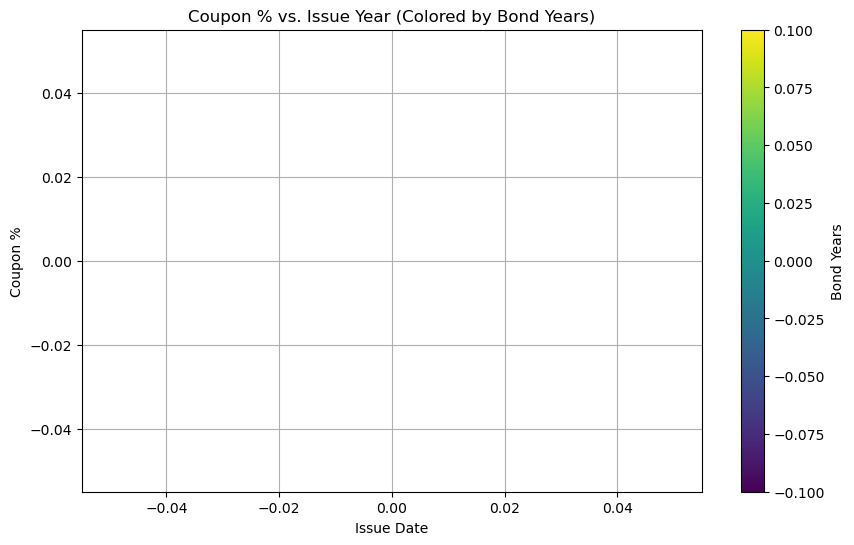

In [16]:
plot_coupon_issue(filtered_data)

In [17]:
filtered_data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Days,Bond Months,Bond Years,Maturity Year,Issue Year
